# About Dataset

This dataset is randomly collected from an Iranian company's database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.
<hr>

## Variable Information:

Anonymous Customer ID

**Call Failures:** number of call failures

**Complains:** binary (0: No complaint, 1: complaint)

**Subscription Length:** total months of subscription

**Charge Amount:** Ordinal attribute (0: lowest amount, 9: highest amount)

**Seconds of Use:** total seconds of calls

**Frequency of use:** total number of calls

**Frequency of SMS:** total number of text messages

**Distinct Called Numbers:** total number of distinct phone calls

**Age Group:** ordinal attribute (1: younger age, 5: older age)

**Tariff Plan:** binary (1: Pay as you go, 2: contractual)

**Status:** binary (1: active, 2: non-active)

**Churn:** binary (1: churn, 0: non-churn) - Class label

**Customer Value:** The calculated value of customer

In [1]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.contingency import chi2_contingency
from scipy.stats import normaltest, shapiro
import plotly.express as px
import warnings
from scipy import stats   
import gc
import matplotlib
import pprint
import seaborn as sns 
from IPython.display import Markdown, display
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils import resample
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
import multiprocessing
import pickle, joblib
from IPython.display import Markdown, display
# utility function to print markdown string
def printmd(string):
    display(Markdown(string))
    
    

import warnings  
warnings.filterwarnings("ignore", category=UserWarning)
matplotlib.rcParams["axes.labelsize"] = 9
matplotlib.rcParams["legend.fontsize"] = 9
matplotlib.rcParams["ytick.labelsize"] = 9
matplotlib.rcParams["xtick.labelsize"] = 9
sns.set_style('whitegrid')
init_notebook_mode(connected=True) # to display plotly graph offline
%matplotlib inline
pd.set_option("display.max_columns", 50)

In [2]:
df= pd.read_csv(r"Customer Churn_iranian.csv")

In [3]:
df.head()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

# 1.EDA

In [4]:
n_rows, n_columns = df.shape
print(f"Number of columns: {n_columns} columns\nNumber of rws: {n_rows} rows")

Number of columns: 14 columns
Number of rws: 3150 rows


In [5]:
df.dtypes

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [7]:
print('Known observations: {}\nUnique observations: {}'.format(len(df.index),len(df.drop_duplicates().index)))
if len(df.index)==len(df.drop_duplicates().index):
    print("there is no duplicate")
else:
    print("there is {} duplicates.".format(len(df.index) - len(df.drop_duplicates().index)))

Known observations: 3150
Unique observations: 2850
there is 300 duplicates.


In [8]:
df.describe().T

count         mean          std   min         25%  \
Call  Failure            3150.0     7.627937     7.263886   0.0     1.00000   
Complains                3150.0     0.076508     0.265851   0.0     0.00000   
Subscription  Length     3150.0    32.541905     8.573482   3.0    30.00000   
Charge  Amount           3150.0     0.942857     1.521072   0.0     0.00000   
Seconds of Use           3150.0  4472.459683  4197.908687   0.0  1391.25000   
Frequency of use         3150.0    69.460635    57.413308   0.0    27.00000   
Frequency of SMS         3150.0    73.174921   112.237560   0.0     6.00000   
Distinct Called Numbers  3150.0    23.509841    17.217337   0.0    10.00000   
Age Group                3150.0     2.826032     0.892555   1.0     2.00000   
Tariff Plan              3150.0     1.077778     0.267864   1.0     1.00000   
Status                   3150.0     1.248254     0.432069   1.0     1.00000   
Age                      3150.0    30.998413     8.831095  15.0    25.00000   
Customer Value           3150.0   470.972916   517.015433   0.0   113.80125   
Churn                    3150.0     0.157143     0.363993   0.0     0.00000   

                             50%         75%       max  
Call  Failure               6.00    12.00000     36.00  
Complains                   0.00     0.00000      1.00  
Subscription  Length       35.00    38.00000     47.00  
Charge  Amount              0.00     1.00000     10.00  
Seconds of Use           2990.00  6478.25000  17090.00  
Frequency of use           54.00    95.00000    255.00  
Frequency of SMS           21.00    87.00000    522.00  
Distinct Called Numbers    21.00    34.00000     97.00  
Age Group                   3.00     3.00000      5.00  
Tariff Plan                 1.00     1.00000      2.00  
Status                      1.00     1.00000      2.00  
Age                        30.00    30.00000     55.00  
Customer Value            228.48   788.38875   2165.28  
Churn                       0.00     0.00000      1.00

In [9]:
df.isna().sum()
# indices_null_tc = df[df[""].isna()].index
# display(df.iloc[indices_null_tc])

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [10]:
display(df[df.Churn == 1].head(2))

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
16              0          0                    37               0   
18              0          0                    37               0   

    Seconds of Use  Frequency of use  Frequency of SMS  \
16             875                14                 0   
18               0                 0                 0   

    Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
16                       11          2            1       2   25   
18                        0          2            1       2   25   

    Customer Value  Churn  
16          40.005      1  
18           0.000      1

In [11]:
print("**Unique Values By Features**")
for feature in df.columns:
    uniq = np.unique(df[feature])
    print(feature.ljust(21),len(uniq))

**Unique Values By Features**
Call  Failure         37
Complains             2
Subscription  Length  45
Charge  Amount        11
Seconds of Use        1756
Frequency of use      242
Frequency of SMS      405
Distinct Called Numbers 92
Age Group             5
Tariff Plan           2
Status                2
Age                   5
Customer Value        2654
Churn                 2


In [12]:
printmd("**Data Types**<br>")
df.dtypes.value_counts()

**Data Types**<br>

int64      13
float64     1
dtype: int64

In [17]:
cat_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
num_cols = list(set(df._get_numeric_data().columns))

In [18]:
cat_cols,num_cols

([],
 ['Subscription  Length',
  'Churn',
  'Seconds of Use',
  'Age Group',
  'Customer Value',
  'Status',
  'Distinct Called Numbers',
  'Call  Failure',
  'Charge  Amount',
  'Frequency of SMS',
  'Tariff Plan',
  'Age',
  'Frequency of use',
  'Complains'])

In [19]:
# Tariff Plan: binary (1: Pay as you go, 2: contractual)
df.groupby(["Tariff Plan","Churn"]).agg({"Age Group":["count","mean"],"Subscription  Length":["count","max","min","mean"]})

Age Group           Subscription  Length                   
                      count      mean                count max min       mean
Tariff Plan Churn                                                            
1           0          2416  2.877897                 2416  47   3  33.144868
            1           489  2.801636                  489  45   3  31.924335
2           0           239  2.364017                  239  45   9  27.786611
            1             6  2.333333                    6  36  25  29.500000

# 2.Descriptive Analysis

### Summarizing the statistical information.


In [20]:
styled_df = (
    df.describe()
    .drop("count", axis=0)
    .style.background_gradient(axis=0, cmap="magma")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
    .set_caption("Summary Statistics")
)

styled_df

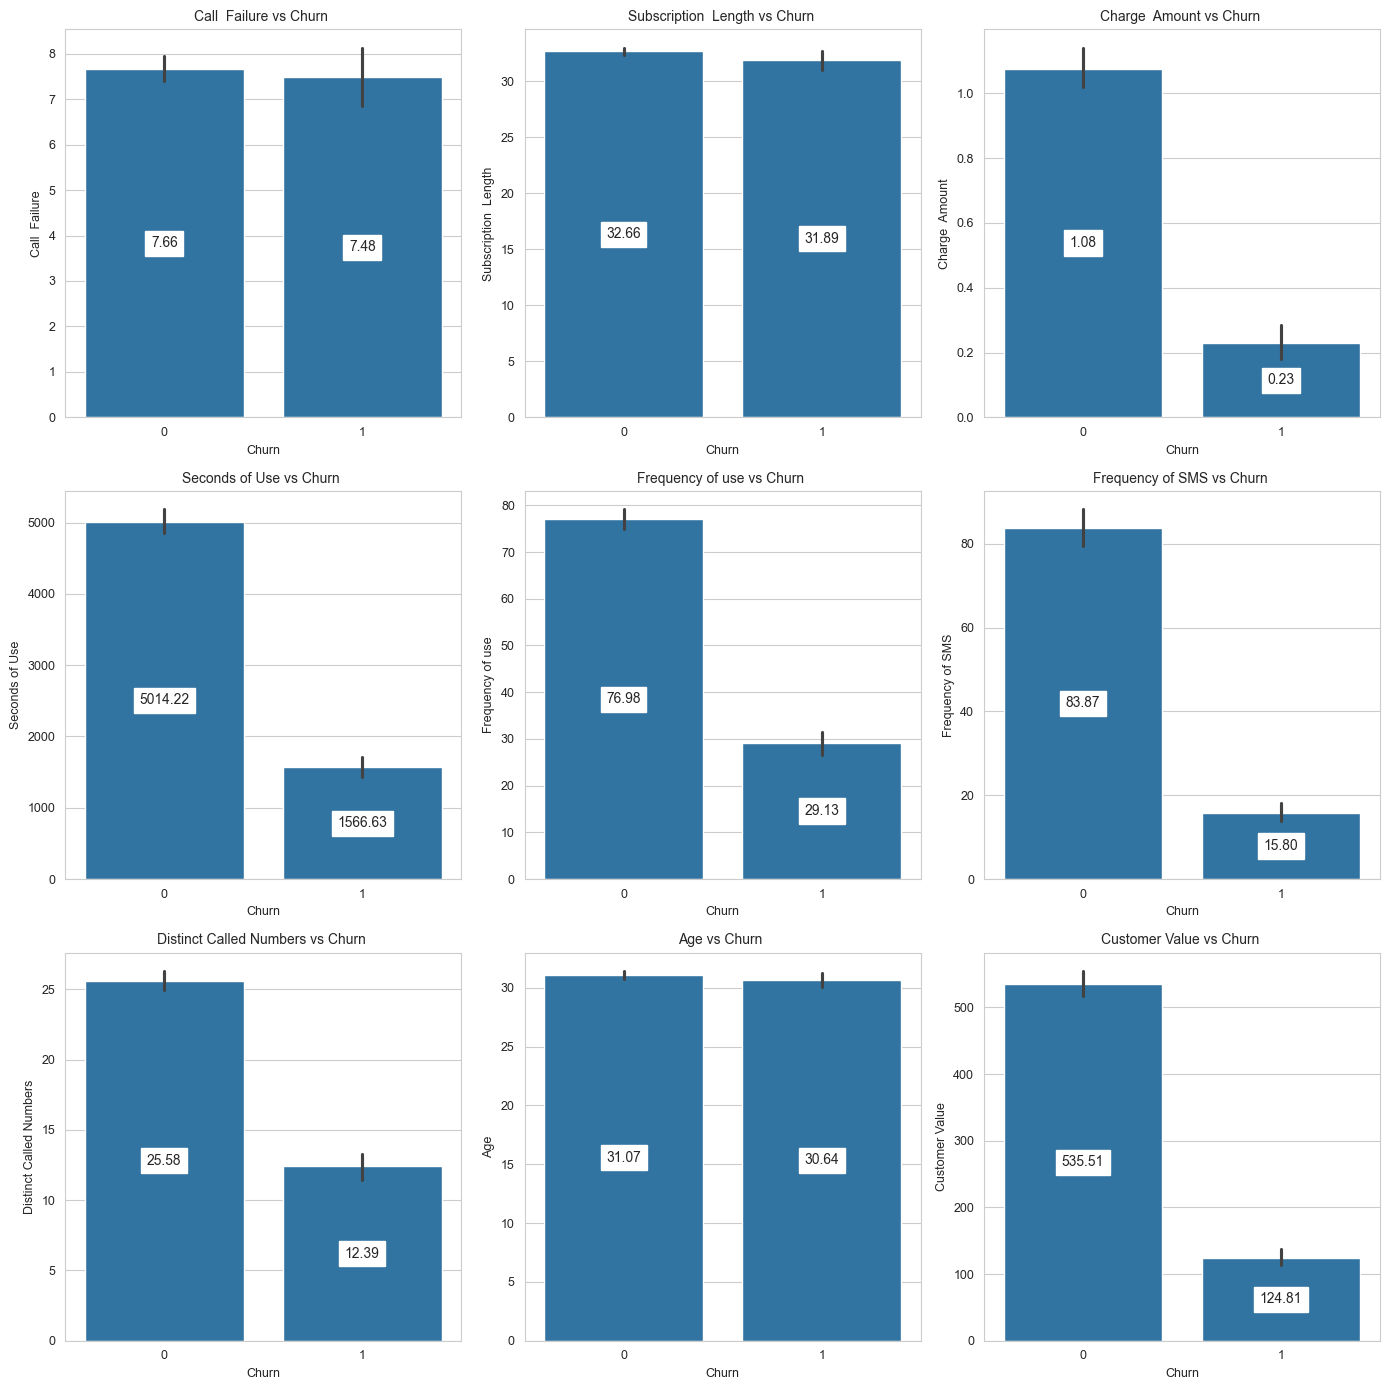

In [21]:

cols=["Call  Failure","Subscription  Length","Charge  Amount","Seconds of Use","Frequency of use","Frequency of SMS","Distinct Called Numbers","Age","Customer Value"]
fig, axes = plt.subplots(3,3, figsize=(14, 14))
axes = axes.flatten()
for i, column in enumerate(cols):
    ax = axes[i]
    sns.barplot(data=df, x="Churn", y=column, ax=ax, estimator=np.mean)
    ax.set_title(f"{column} vs Churn ", fontsize=10)

    for k in ax.containers:
        ax.bar_label(
            k, fontsize=10, label_type="center", backgroundcolor="w", fmt="%.2f"
        )
fig.add_axes(axes[-1])
plt.tight_layout()
plt.show()

In [ ]:
cols_multi=["Complains","Age Group","Tariff Plan","Status"]

In [ ]:
categorical_counts = pd.DataFrame(
    columns=[0, 1], index=pd.MultiIndex.from_tuples([("Group 1", "A")])
)
for column in cols_multi:
    table = pd.crosstab(index=df[column], columns=df["Churn"])
    index = pd.MultiIndex.from_tuples(
        list(zip([column] * df[column].nunique(), df[column].unique()))
    )
    table.index = index
    categorical_counts = pd.concat([categorical_counts, table])

categorical_counts.drop(categorical_counts.index[0], inplace=True)

categorical_counts.style.bar(
    axis=0, subset=[0, 1], align=100, width=100, height=70, color="cyan"
)

In [ ]:
cols_multi=["Complains","Age Group","Tariff Plan","Status"]
# cat_cols = df["Complains","Age Group","Tariff Plan","Status"]

fig, axes = plt.subplots(2,2, figsize=(20, 18), dpi=500)
axes = axes.flatten()
fig.suptitle("Churn vs diffrent feature", fontsize=25, fontweight="bold", y=1)

for i, col in enumerate(cols_multi):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue="Churn", ax=ax, palette="Set2")
    ax.legend(frameon=True, facecolor="inherit", shadow=True)
    ax.set_title(f"Churn by {col}", fontsize=13)
    plt.tight_layout(pad=0.6)

    for i in ax.containers:
        ax.bar_label(i, fontsize=13)

plt.tight_layout()

**Interpretation of results**
- Complains: binary (0: No complaint, 1: complaint)
- Age Group: ordinal attribute (1: younger age, 5: older age)
- Tariff Plan: binary (1: Pay as you go, 2: contractual)
- Status: binary (1: active, 2: non-active)


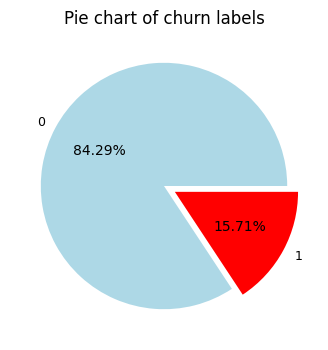

In [ ]:
# Getting a sense of the percentage of churn labels
churn_label_count = df["Churn"].value_counts()
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(
    churn_label_count,
    autopct="%.2f%%",
    labels=churn_label_count.index,
    colors=["lightblue", "red"],
    explode=[0, 0.1],
)
plt.title("Pie chart of churn labels")
plt.show()

### binning 

In [ ]:
def binning_feature(feature):
    plt.hist(df[feature])

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

    bins = np.linspace(min(df[feature]), max(df[feature]), 4)
    
    print("**Value Range**")
    
    print(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
    print(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
    print(f"High ({bins[2]: .2f} - {bins[3]: .2f})")

    group_names = ['Low', 'Medium', 'High']

    df.insert(df.shape[1]-1,f'{feature}-binned', pd.cut(df[feature], bins, labels=group_names, include_lowest=True))
    display(df[[feature, f'{feature}-binned']].head(10))


    # count values
    print("Binning Distribution")
    display(df[f'{feature}-binned'].value_counts())


    # plot the distribution of each bin
    plt.bar(group_names, df[f'{feature}-binned'].value_counts())
    # px.bar(data_canada, x='year', y='pop')

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

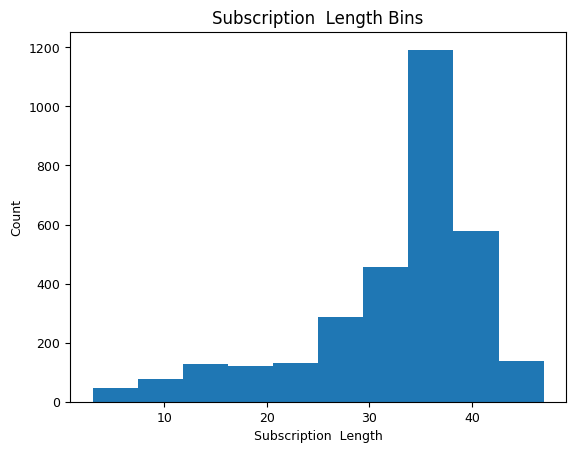

**Value Range**
Low ( 3.00 -  17.67)
Medium ( 17.67 -  32.33)
High ( 32.33 -  47.00)


Subscription  Length Subscription  Length-binned
0                    38                        High
1                    39                        High
2                    37                        High
3                    38                        High
4                    38                        High
5                    38                        High
6                    38                        High
7                    37                        High
8                    38                        High
9                    38                        High

<br>**Binning Distribution**<br>


High      2058
Medium     810
Low        282
Name: Subscription  Length-binned, dtype: int64

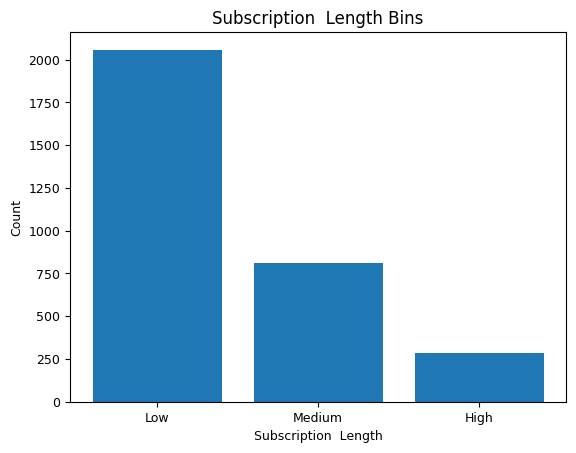

In [ ]:
binning_feature("Subscription  Length")

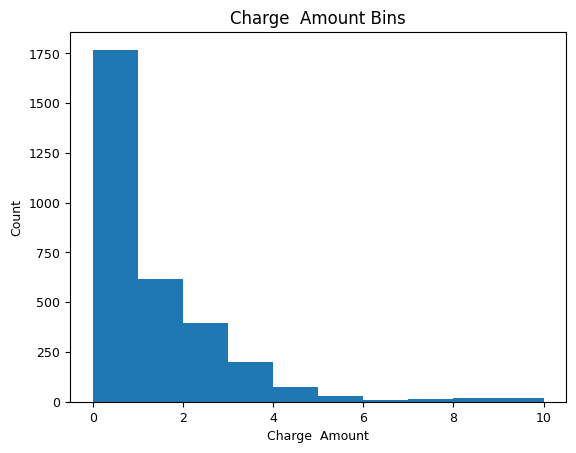

**Value Range**
Low ( 0.00 -  3.33)
Medium ( 3.33 -  6.67)
High ( 6.67 -  10.00)


Charge  Amount Charge  Amount-binned
0               0                   Low
1               0                   Low
2               0                   Low
3               0                   Low
4               0                   Low
5               1                   Low
6               0                   Low
7               2                   Low
8               0                   Low
9               1                   Low

Binning Distribution


Low       2979
Medium     117
High        54
Name: Charge  Amount-binned, dtype: int64

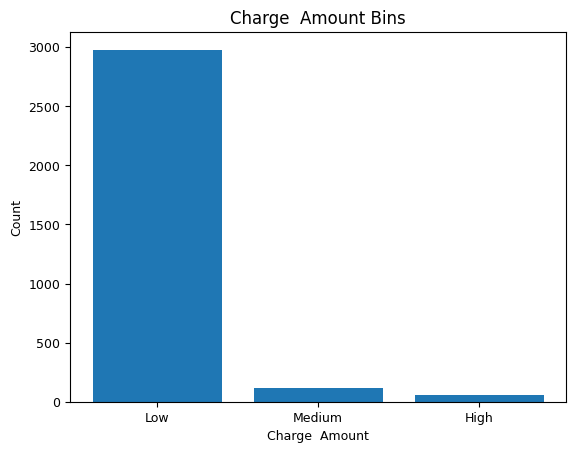

In [ ]:
binning_feature("Charge  Amount")

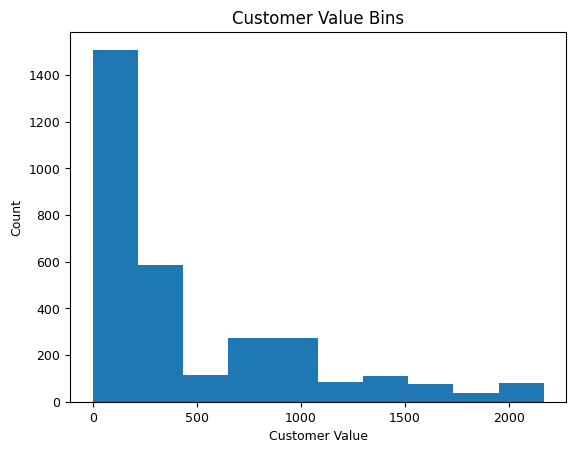

**Value Range**
Low ( 0.00 -  721.76)
Medium ( 721.76 -  1443.52)
High ( 1443.52 -  2165.28)


Customer Value Customer Value-binned
0         197.640                   Low
1          46.035                   Low
2        1536.520                  High
3         240.020                   Low
4         145.805                   Low
5         282.280                   Low
6        1235.960                Medium
7         945.440                Medium
8         557.680                   Low
9         191.920                   Low

Binning Distribution


Low       2268
Medium     649
High       233
Name: Customer Value-binned, dtype: int64

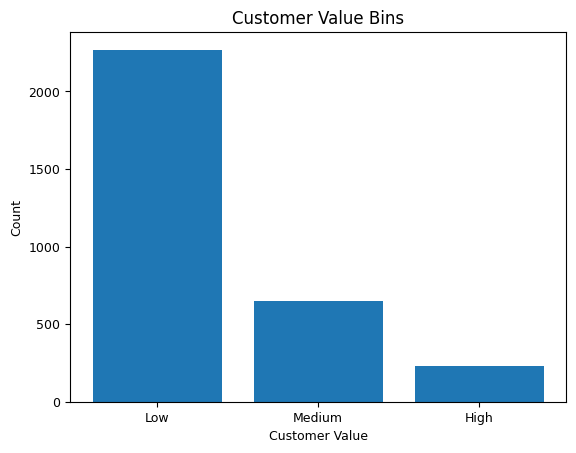

In [ ]:
binning_feature("Customer Value")

# 3.Correlation Analysis

In [12]:
df.corr()

Call  Failure  Complains  Subscription  Length  \
Call  Failure                 1.000000   0.152879              0.169737   
Complains                     0.152879   1.000000             -0.020286   
Subscription  Length          0.169737  -0.020286              1.000000   
Charge  Amount                0.589028  -0.033948              0.078789   
Seconds of Use                0.501607  -0.104952              0.124618   
Frequency of use              0.573349  -0.090774              0.106534   
Frequency of SMS             -0.022282  -0.111633              0.076318   
Distinct Called Numbers       0.504058  -0.058199              0.092009   
Age Group                     0.050406   0.019976              0.021453   
Tariff Plan                   0.192285   0.001140             -0.159680   
Status                       -0.114645   0.271405              0.142841   
Age                           0.041758   0.003298             -0.002430   
Customer Value                0.121225  -0.132895              0.109565   
Churn                        -0.008987   0.532053             -0.032588   

                         Charge  Amount  Seconds of Use  Frequency of use  \
Call  Failure                  0.589028        0.501607          0.573349   
Complains                     -0.033948       -0.104952         -0.090774   
Subscription  Length           0.078789        0.124618          0.106534   
Charge  Amount                 1.000000        0.446738          0.379096   
Seconds of Use                 0.446738        1.000000          0.946489   
Frequency of use               0.379096        0.946489          1.000000   
Frequency of SMS               0.091533        0.102123          0.100019   
Distinct Called Numbers        0.415198        0.676536          0.736114   
Age Group                      0.279679        0.020060         -0.032544   
Tariff Plan                    0.324232        0.133593          0.206452   
Status                        -0.356269       -0.460618         -0.454752   
Age                            0.278955        0.020843         -0.028350   
Customer Value                 0.169428        0.415087          0.401572   
Churn                         -0.202305       -0.298935         -0.303337   

                         Frequency of SMS  Distinct Called Numbers  Age Group  \
Call  Failure                   -0.022282                 0.504058   0.050406   
Complains                       -0.111633                -0.058199   0.019976   
Subscription  Length             0.076318                 0.092009   0.021453   
Charge  Amount                   0.091533                 0.415198   0.279679   
Seconds of Use                   0.102123                 0.676536   0.020060   
Frequency of use                 0.100019                 0.736114  -0.032544   
Frequency of SMS                 1.000000                 0.079650  -0.053719   
Distinct Called Numbers          0.079650                 1.000000   0.020941   
Age Group                       -0.053719                 0.020941   1.000000   
Tariff Plan                      0.195686                 0.172079  -0.150593   
Status                          -0.296164                -0.413039   0.002506   
Age                             -0.092798                 0.051037   0.960758   
Customer Value                   0.924877                 0.284807  -0.183481   
Churn                           -0.220754                -0.278867  -0.014550   

                         Tariff Plan    Status       Age  Customer Value  \
Call  Failure               0.192285 -0.114645  0.041758        0.121225   
Complains                   0.001140  0.271405  0.003298       -0.132895   
Subscription  Length       -0.159680  0.142841 -0.002430        0.109565   
Charge  Amount              0.324232 -0.356269  0.278955        0.169428   
Seconds of Use              0.133593 -0.460618  0.020843        0.415087   
Frequency of use            0.206452 -0.454752 -0.028350        0.40157

Wherever you see the number 0.5, it means we have correlated features for example Charge Amount and Call Failure and Seconds of Use	

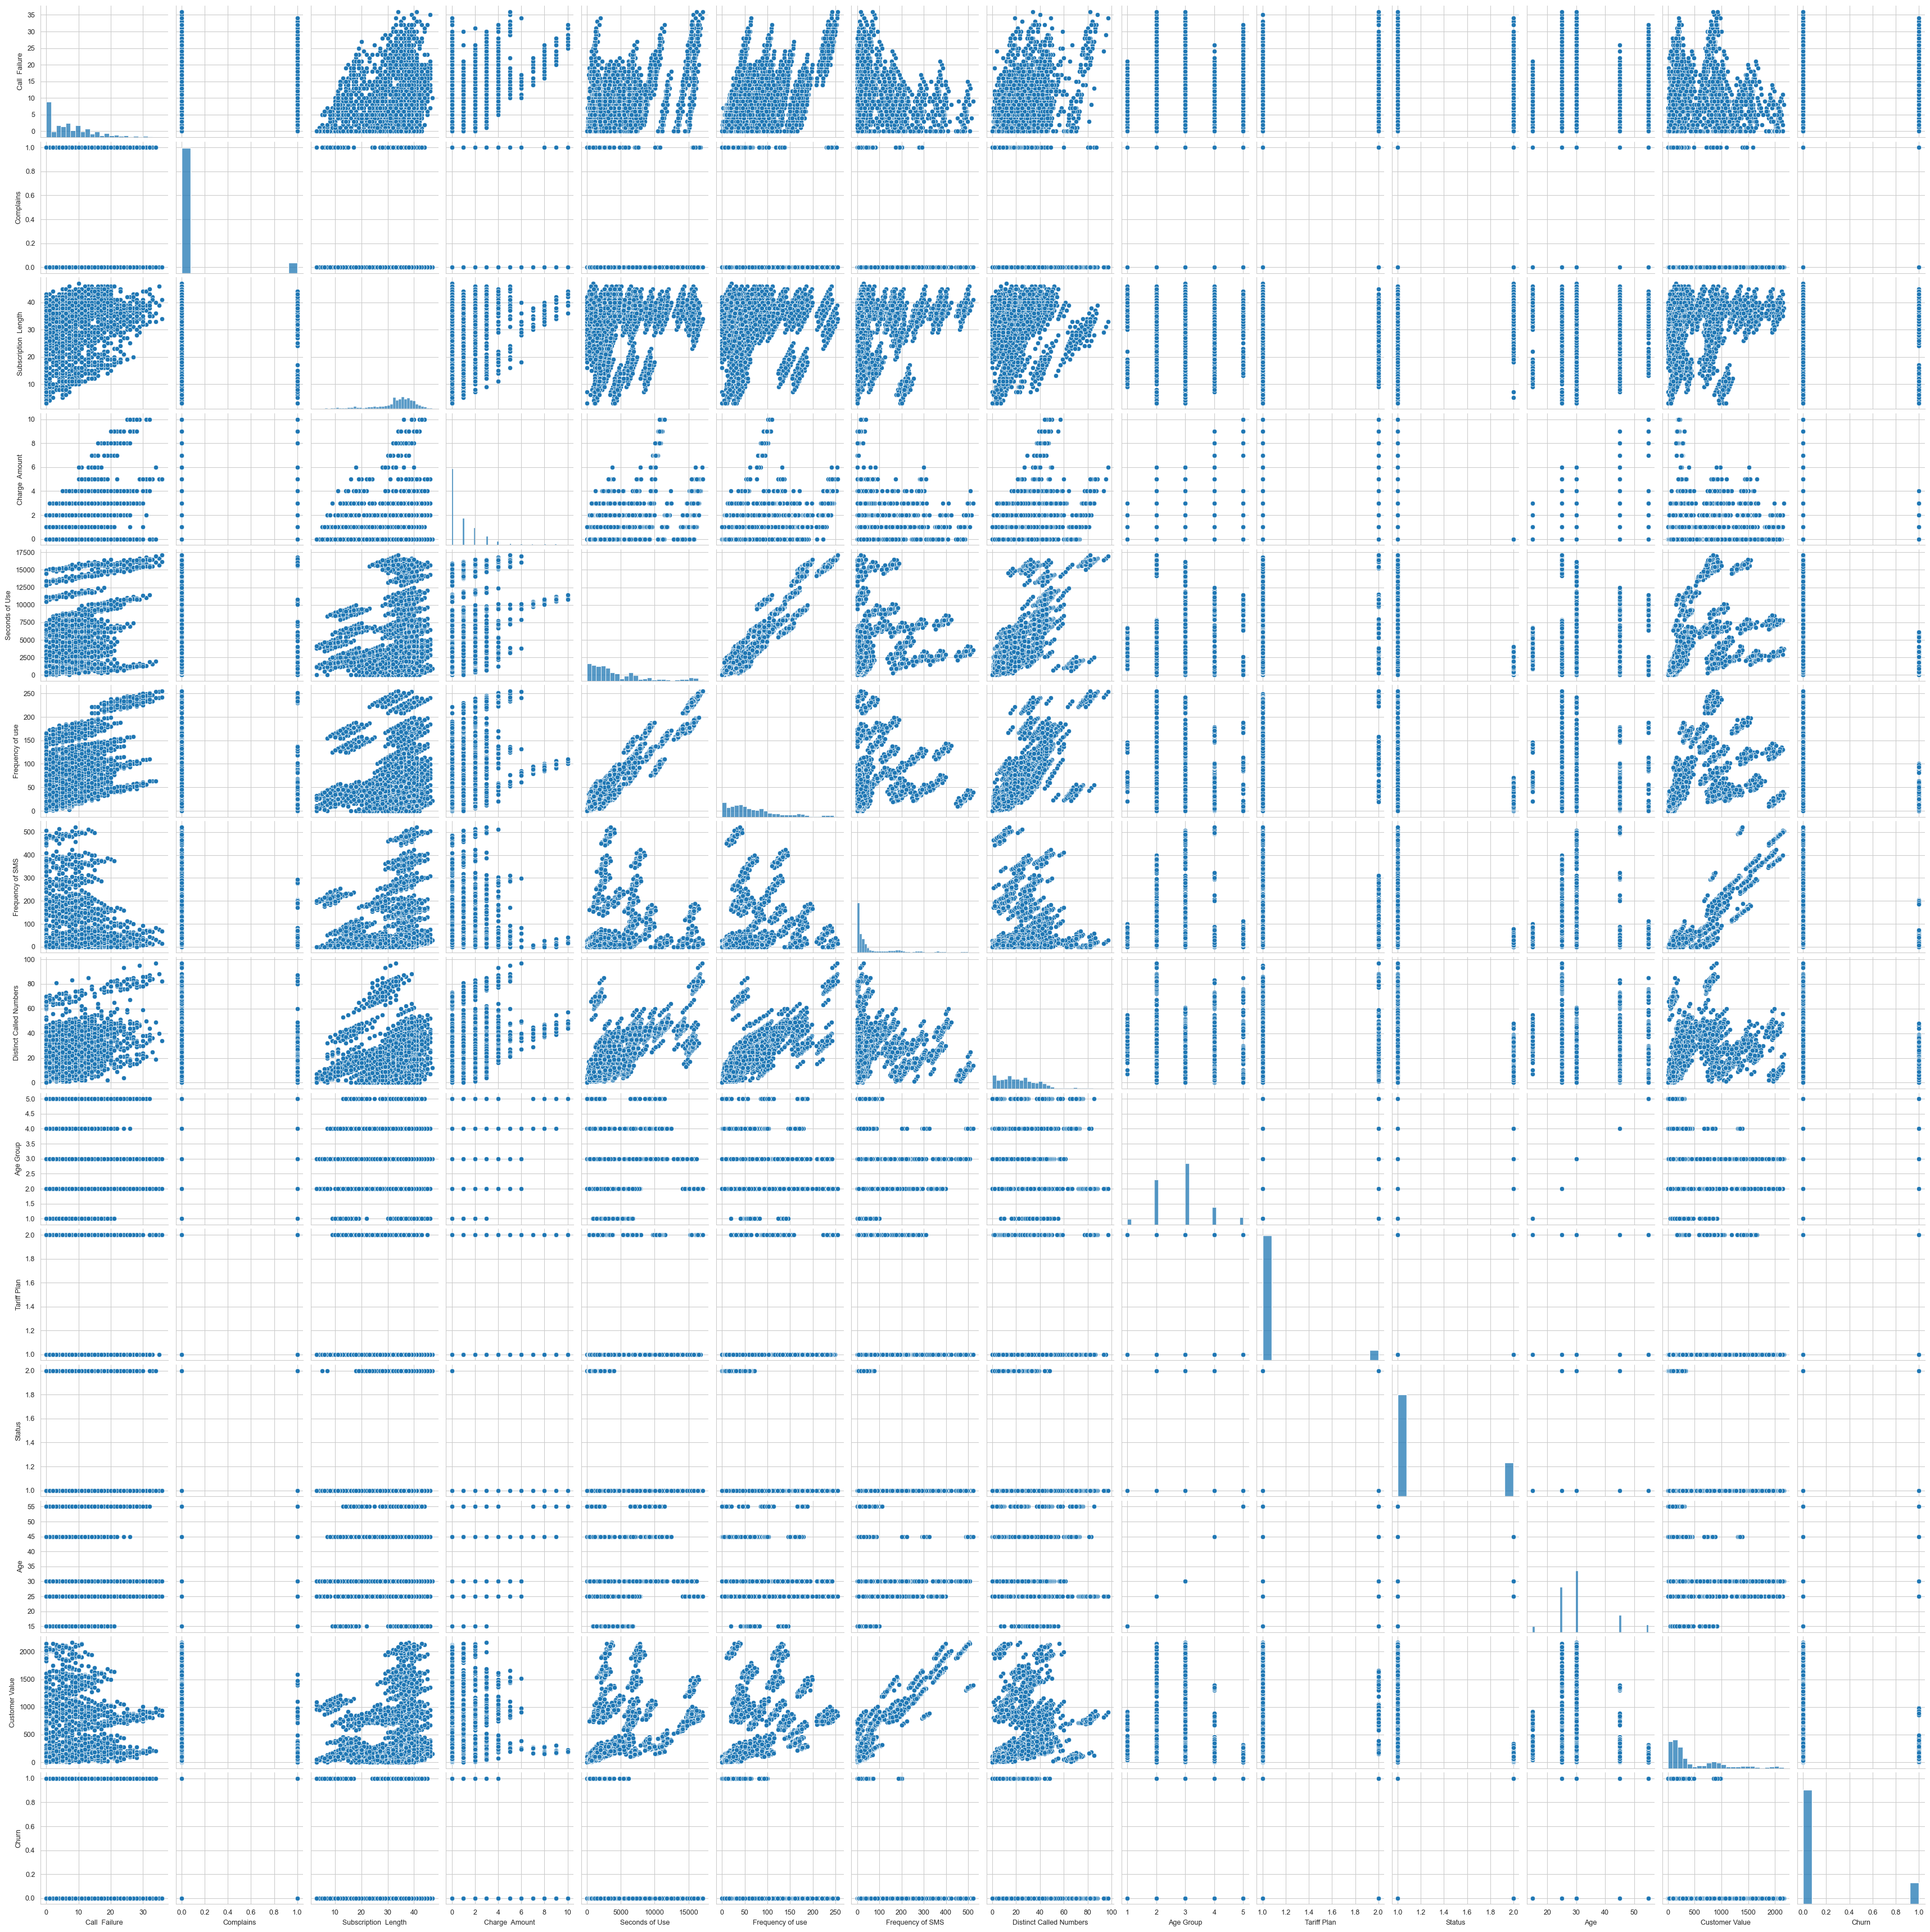

In [14]:
sns.pairplot(df)

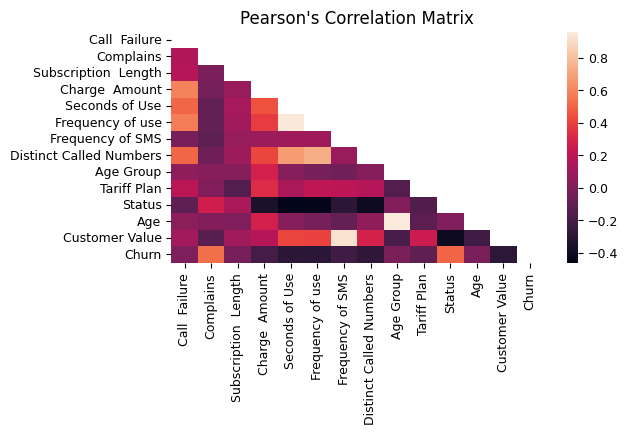

In [ ]:
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 3))
sns.heatmap(corr, mask=mask, fmt=".2f", linecolor="c")
plt.title("Pearson's Correlation Matrix")
plt.show()

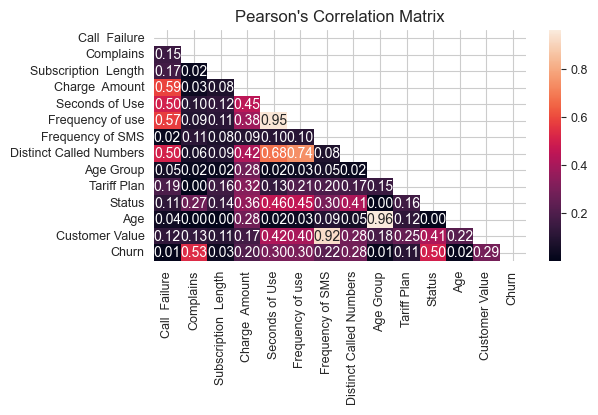

In [16]:
corr = df.corr(numeric_only=True).abs()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 3))
sns.heatmap(corr, mask=mask, fmt=".2f", linecolor="c",annot=True)
plt.title("Pearson's Correlation Matrix")
plt.show()


When we take the absolute value (abs), those that are brighter are more correlated

In [48]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn                      1.000000
Complains                  0.532053
Status                     0.498976
Call  Failure             -0.008987
Age Group                 -0.014550
Age                       -0.017705
Subscription  Length      -0.032588
Tariff Plan               -0.105853
Charge  Amount            -0.202305
Frequency of SMS          -0.220754
Distinct Called Numbers   -0.278867
Customer Value            -0.289144
Seconds of Use            -0.298935
Frequency of use          -0.303337
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>


The highest correlation between features and churn ---> Complains,Status

# 4.Univariate Analysis

### Statistical Normality Tests
Normality tests are used to determine if a dataset is normally distributed and to check how likely it is for a random variable in the dataset to be normally distributed.
Popular normality tests - D’Agostino’s K^2, Shapiro-Wilk, Anderson-Darling .
There are 4 numerical features in this dataset - Subscription Length,Seconds of Use,Frequency of use,Customer Value

### Hypotheses 
H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.


### D’Agostino’s K^2 Test¶


In [ ]:
stat, p = stats.normaltest(df['Subscription  Length'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=626.87674, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
stat, p = stats.normaltest(df['Seconds of Use'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=620.04806, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
stat, p = stats.normaltest(df['Frequency of use'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=503.54400, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
stat, p = stats.normaltest(df['Customer Value'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=700.26772, p=0.000
Sample does not look Gaussian (reject H0)


### Anderson-Darling Test
Critical values in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value.

Rather than just a single p-value, this test returns a critical value for a range of different commonly used significance levels.

In this case - normal/exponential (15%, 10%, 5%, 2.5%, 1%)

In [ ]:
result = stats.anderson(df['Customer Value'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

Statistic: 235.281
Significance level 15.00 % : critical value 0.575, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.655, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.786, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.917, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.091, data does not look normal (reject H0)


# 5.Outliers Analysis

### **Outlier Detection**
Outlier can be of two types: Univariate and Multivariate. Above, we have discussed the example of univariate outlier. These outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space.
### Different outlier detection technique.
1. Hypothesis Testing
2. Z-score method
3. Robust Z-score
4. I.Q.R method
5. Winsorization method(Percentile Capping)
6. DBSCAN Clustering
7. Isolation Forest
8. Visualizing the data

### DBSCAN for outlier detection

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore, median_abs_deviation
from scipy.stats.mstats import winsorize
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

outlier_detection_results = {}
outlier_detection_results_after_log = {}
# Function to apply all outlier detection methods
def detect_outliers(column):
    results = {}
    data = df[column].dropna()  # Drop NA values for the column
    
    # Z-score method
    z_scores = zscore(data)
    outliers_z = np.where(np.abs(z_scores) > 3)[0]
    results['Z-score'] = outliers_z.tolist()
    
    # Robust Z-score method
    median = np.median(data)
    mad = median_abs_deviation(data)
    robust_z_scores = [(x - median) / mad for x in data]
    outliers_robust_z = np.where(np.abs(robust_z_scores) > 3)[0]
    results['Robust Z-score'] = outliers_robust_z.tolist()
    
    # IQR method
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    outliers_iqr = np.where((data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR))[0]
    results['IQR'] = outliers_iqr.tolist()
    
  
    
    # DBSCAN Clustering
    dbscan = DBSCAN(eps=3, min_samples=2)
    labels = dbscan.fit_predict(data.values.reshape(-1, 1))
    outliers_dbscan = np.where(labels == -1)[0]
    results['DBSCAN'] = outliers_dbscan.tolist()
    
    # Isolation Forest
    iso_forest = IsolationForest(contamination=0.1)
    iso_labels = iso_forest.fit_predict(data.values.reshape(-1, 1))
    outliers_isoforest = np.where(iso_labels == -1)[0]
    results['Isolation Forest'] = outliers_isoforest.tolist()
    
    return results

# Apply outlier detection to all numerical columns
for column in df.columns:
    outlier_detection_results[column] = detect_outliers(column)

# Print the results
for column, results in outlier_detection_results.items():
    print(f"Column: {column}")
    for method, outliers in results.items():
        print(f"  {method} method detected {len(outliers)} outliers.")
    print("\n")



Column: Call  Failure
  Z-score method detected 40 outliers.
  Robust Z-score method detected 177 outliers.
  IQR method detected 47 outliers.
  DBSCAN method detected 0 outliers.
  Isolation Forest method detected 276 outliers.


Column: Complains
  Z-score method detected 241 outliers.
  Robust Z-score method detected 241 outliers.
  IQR method detected 241 outliers.
  DBSCAN method detected 0 outliers.
  Isolation Forest method detected 241 outliers.


Column: Subscription  Length
  Z-score method detected 26 outliers.
  Robust Z-score method detected 421 outliers.
  IQR method detected 282 outliers.
  DBSCAN method detected 0 outliers.
  Isolation Forest method detected 298 outliers.


Column: Charge  Amount
  Z-score method detected 65 outliers.
  Robust Z-score method detected 1382 outliers.
  IQR method detected 370 outliers.
  DBSCAN method detected 0 outliers.
  Isolation Forest method detected 171 outliers.


Column: Seconds of Use
  Z-score method detected 1 outliers.
  Robu

###  Hypothesis Testing for outlier detection

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd


def grubbs_test(column_data):
    n = len(column_data)
    mean_x = np.mean(column_data)
    sd_x = np.std(column_data)
    numerator = max(abs(column_data - mean_x))
    g_calculated = numerator / sd_x
    
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    
    if g_critical > g_calculated:
        return False  # No outlier
    else:
        return True  # Outlier detected

# Apply grubbs_test to each column in the DataFrame
outlier_results = {}
for column in df.columns:
    is_outlier = grubbs_test(df[column])
    outlier_results[column] = is_outlier

# Print the results
for column, is_outlier in outlier_results.items():
    if is_outlier:
        print(f"{column} has an outlier.")
    else:
        print(f"{column} does not have any outliers.")


Call  Failure does not have any outliers.
Complains does not have any outliers.
Subscription  Length does not have any outliers.
Charge  Amount has an outlier.
Seconds of Use does not have any outliers.
Frequency of use does not have any outliers.
Frequency of SMS does not have any outliers.
Distinct Called Numbers does not have any outliers.
Age Group does not have any outliers.
Tariff Plan does not have any outliers.
Status does not have any outliers.
Age does not have any outliers.
Customer Value does not have any outliers.
Churn does not have any outliers.


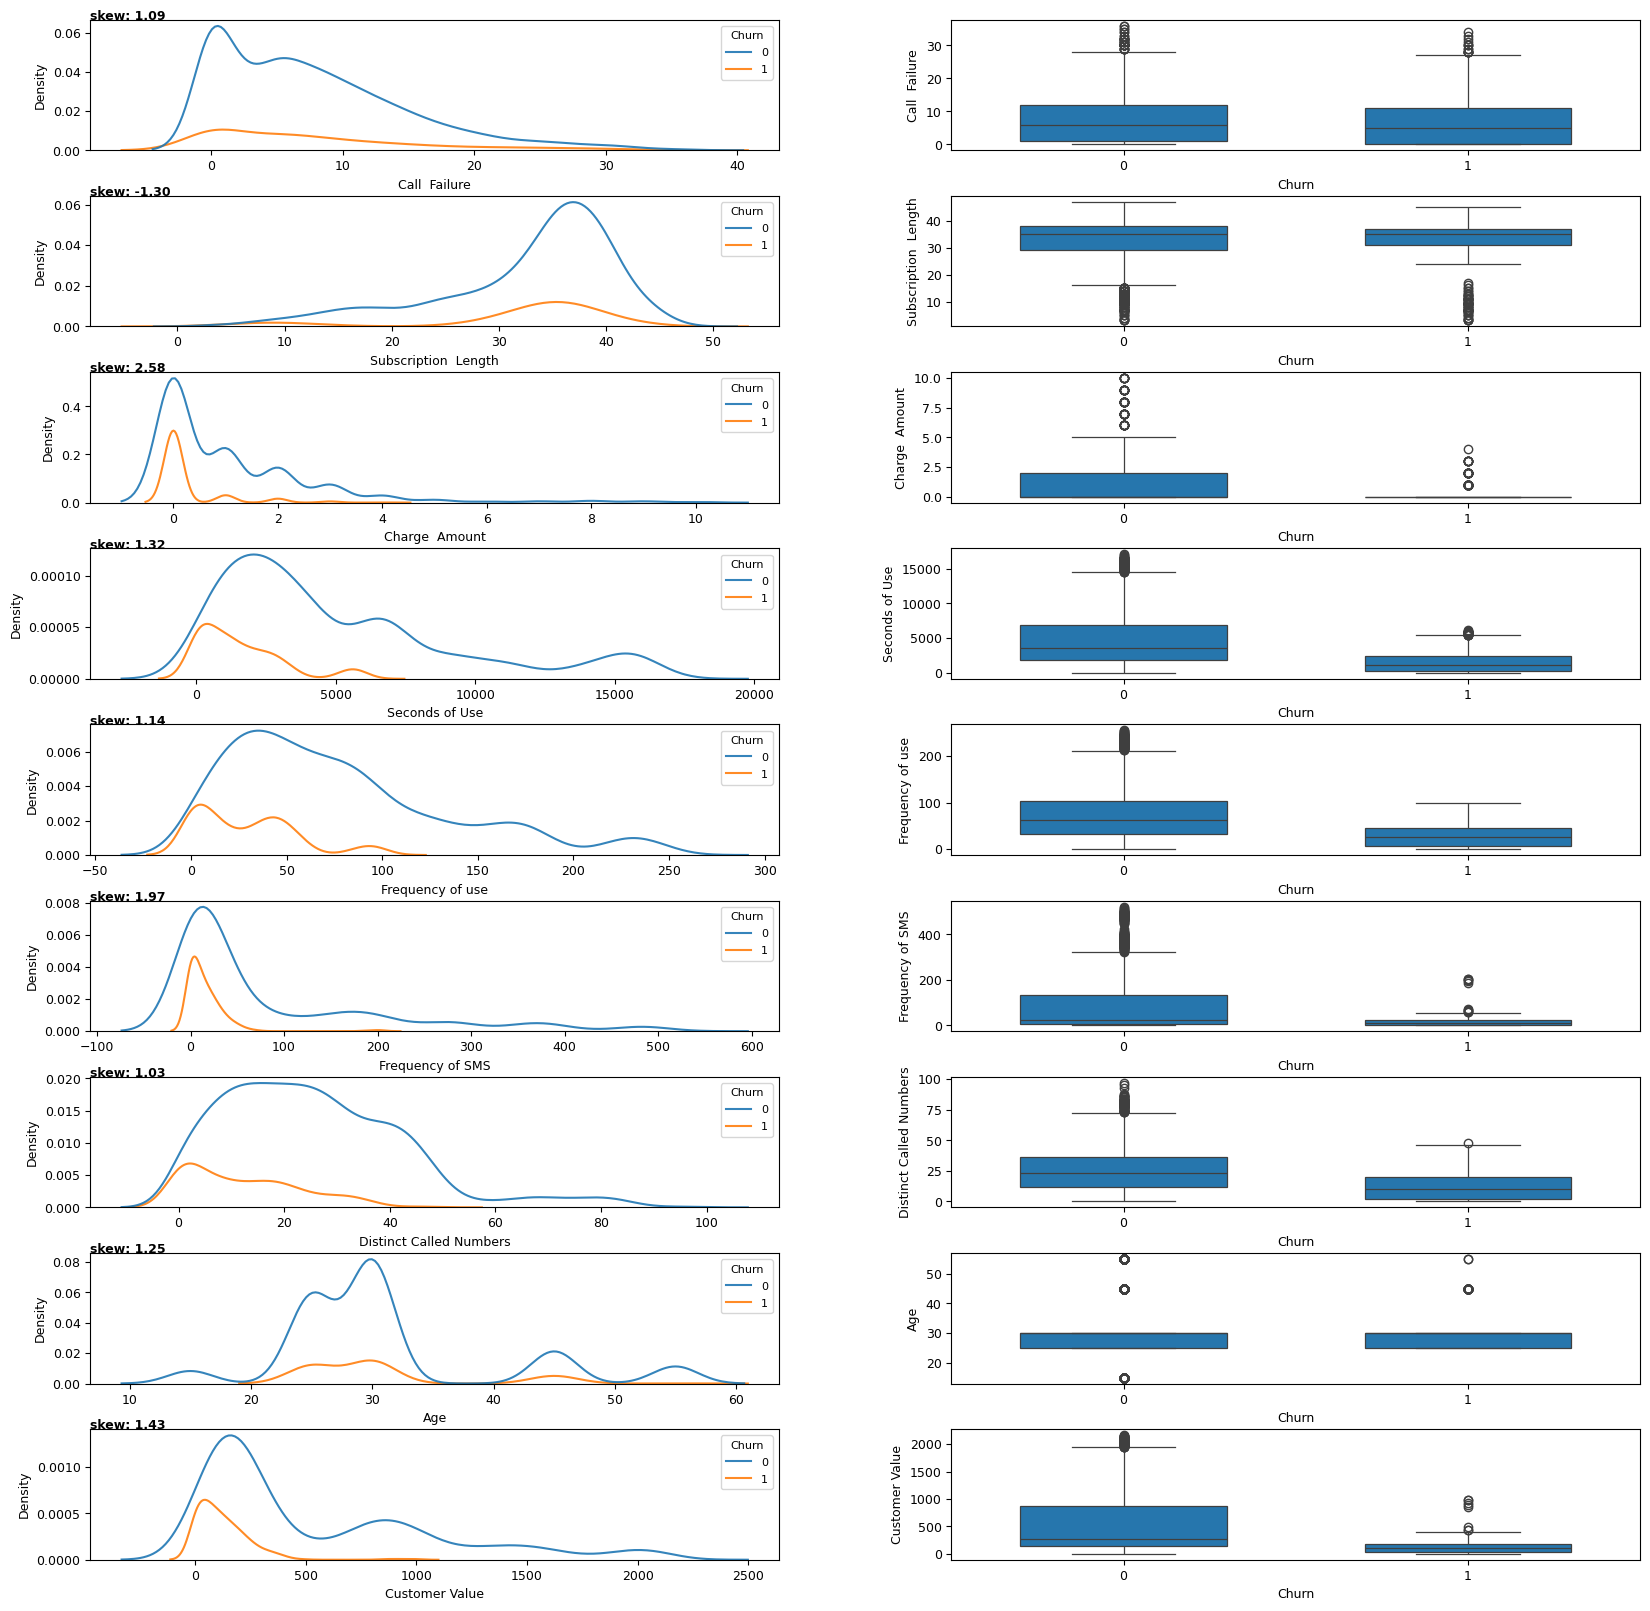

In [ ]:

skewness_before_log = df.skew()
fig, axes = plt.subplots(
    nrows=9,
    ncols=2,
    figsize=(20, 20),
    gridspec_kw={"hspace": 0.35, "wspace": 0.25},
)
axes = axes.flatten()
i = 0
for column in df.columns.drop(["Churn", "Complains", "Age Group", "Tariff Plan", "Status"]):
    ax = axes[i]
    sns.kdeplot(
        data=df, x=column, hue="Churn", ax=ax, fill=False, alpha=0.9, legend=True
    )
    skewness = skewness_before_log[column]
    ax.text(
        ax.get_xlim()[0],
        ax.get_ylim()[-1],
        f"skew: {skewness:.2f}",
        size=9,
        weight="bold",
    )
    legend = ax.get_legend()
    plt.setp(legend.get_title(), fontsize=8)
    for text in legend.get_texts():
        text.set_fontsize(8)

    ax = axes[i + 1]
    sns.boxplot(
        data=df,
        x="Churn",
        y=column,
        ax=ax,
        width=0.6,
        saturation=0.9,
        linewidth=0.9,
    )
    i += 2

From the boxplots, we can see that there are some outliers in all columns.

Solution: We will simply apply log to  columns mitigate the effect of both the outliers and the deviation from normal distribution.

In [ ]:
df_log_last_ = df.copy()
df_log_last_.drop(["Complains", "Age Group", "Tariff Plan", "Status"],axis=1, inplace=True)

In [ ]:

cols=['Call  Failure', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age', 'Customer Value']

for i in cols:
    df_log_last_[i + "_log"] = df_log_last_[i].apply(lambda x: np.log(x) if x > 0 else np.nan)
    df_log_last_.drop(i, axis=1, inplace=True)


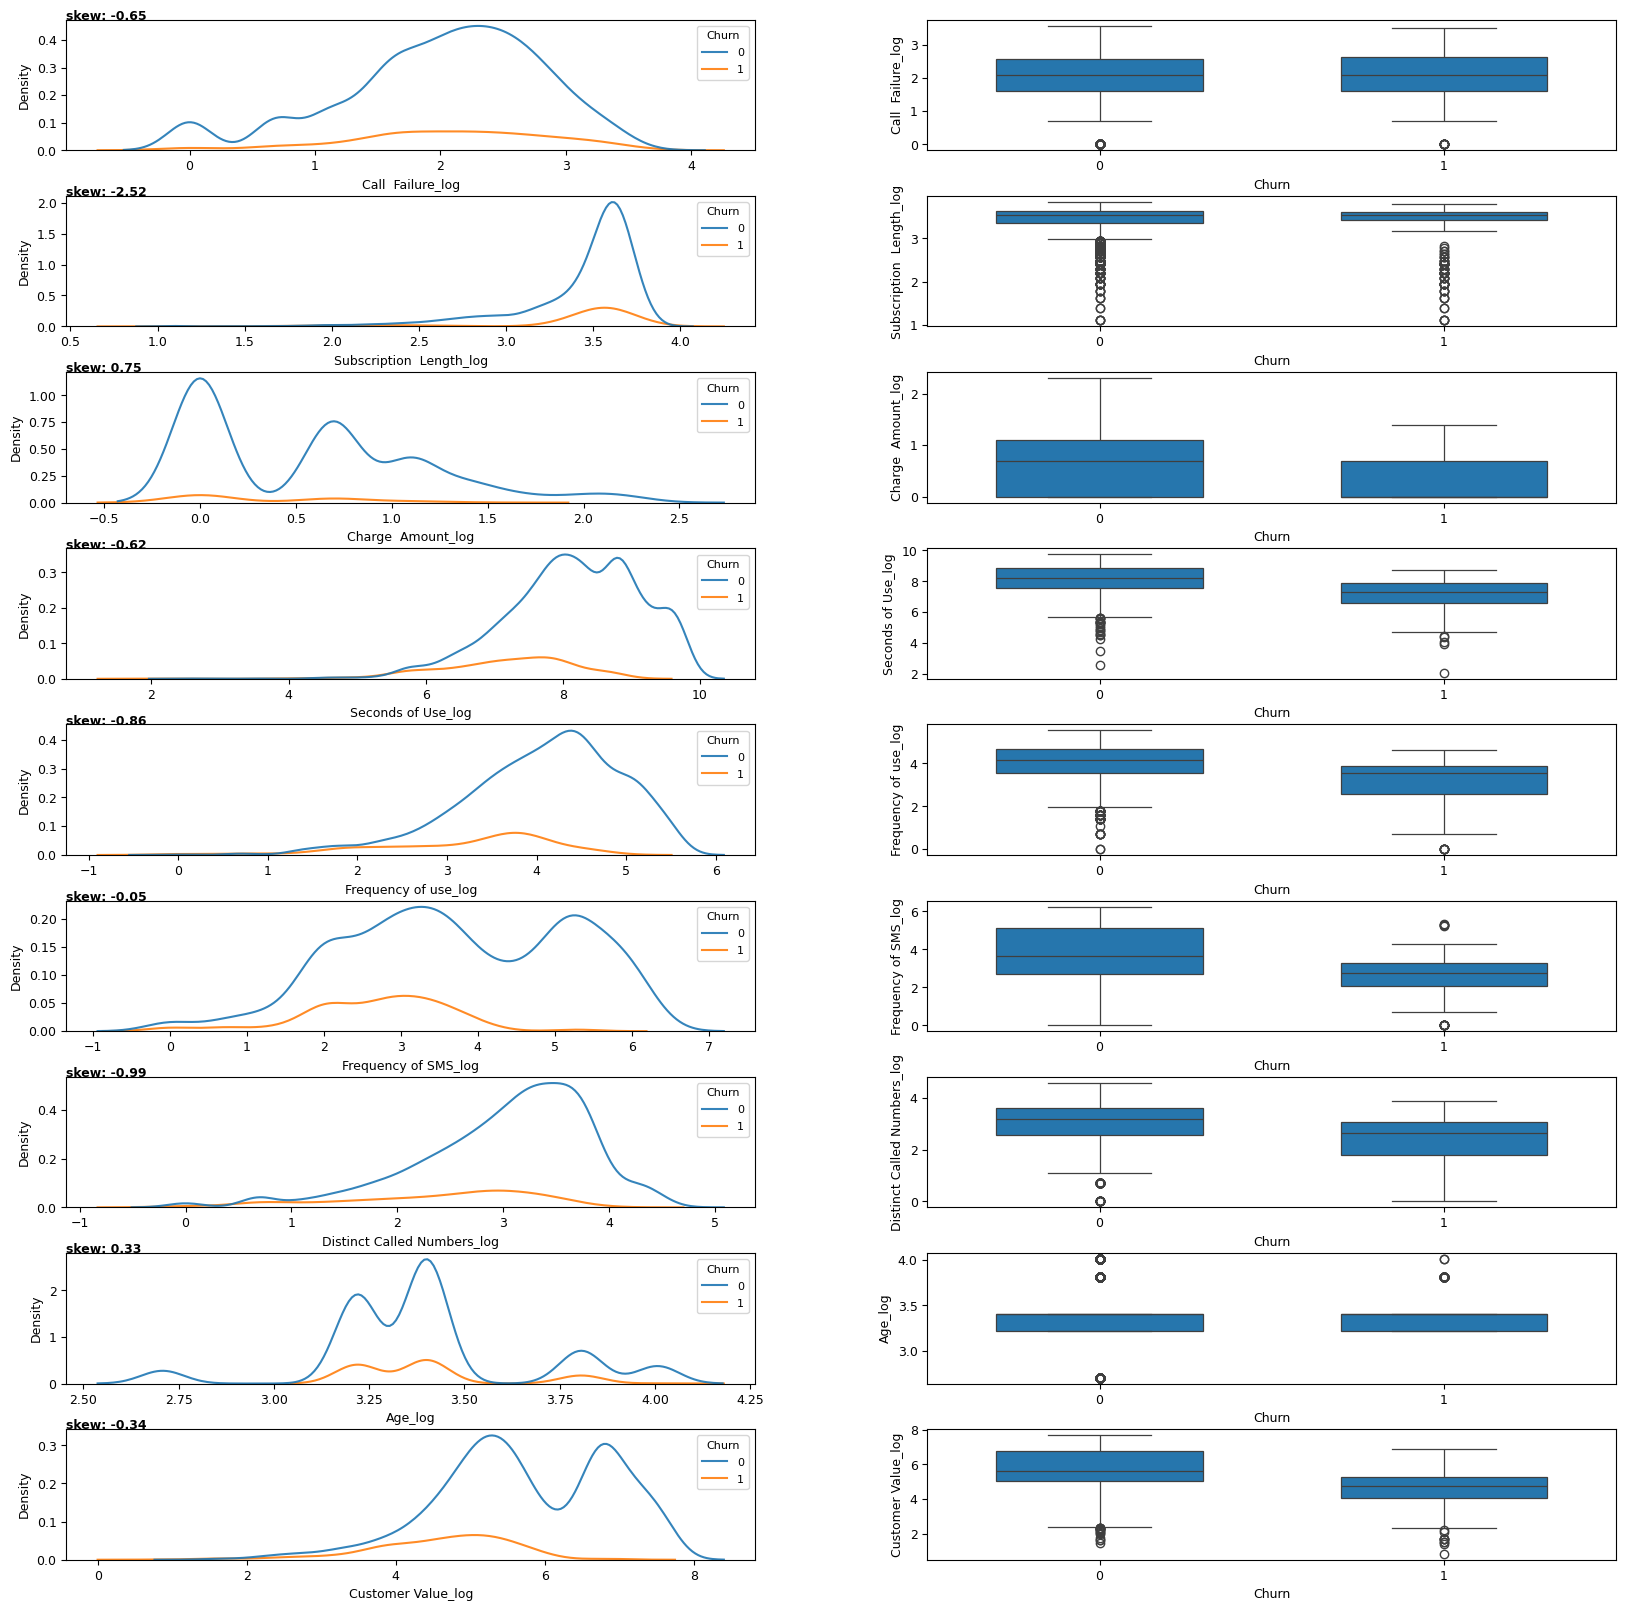

In [ ]:
log_col=['Call  Failure_log', 'Subscription  Length_log',
       'Charge  Amount_log', 'Seconds of Use_log', 'Frequency of use_log',
       'Frequency of SMS_log', 'Distinct Called Numbers_log', 'Age_log',
       'Customer Value_log']

fig, axes = plt.subplots(
    nrows=9,
    ncols=2,
    figsize=(20, 20),
    gridspec_kw={"hspace": 0.35, "wspace": 0.25},
)
axes = axes.flatten()
i = 0

for column in log_col :
    ax = axes[i]
    sns.kdeplot(
        data=df_log_last_, x=df_log_last_[column], hue="Churn", ax=ax, fill=False, alpha=0.9, legend=True
    )
    skewness = df_log_last_[column].skew()
    ax.text(
        ax.get_xlim()[0],
        ax.get_ylim()[-1],
        f"skew: {skewness:.2f}",
        size=9,
        weight="bold",
    )

    legend = ax.get_legend()
    plt.setp(legend.get_title(), fontsize=8)
    for text in legend.get_texts():
        text.set_fontsize(8)

    ax = axes[i + 1]
    sns.boxplot(
        data=df_log_last_,
        x="Churn",
        y=column,
        ax=ax,
        width=0.6,
        saturation=0.9,
        linewidth=0.9,
    )

    i += 2

# 6. Hypothesis Testing

#### Hypothesis Testing
**Hypothesis 1:** Customer Value Impact Churn
Null Hypothesis (H0): There is no significant relationship between Customer Value and Churn.
 Alternative Hypothesis (H1): There is a significant relationship between Customer Value and Churn.

**Hypothesis 2:** Subscription  Length Affects Churn
Null Hypothesis (H0): The Subscription  Length does not affect the likelihood of churn.
Alternative Hypothesis (H1): The Subscription  Length significantly influences the likelihood of churn.


In [ ]:
churn_yes = df[df['Churn'] == 1]['Customer Value']
churn_no = df[df['Churn'] == 0]['Customer Value']

t_stat, p_val = stats.ttest_ind(churn_yes, churn_no)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

T-Statistic: -16.946905380924687
P-Value: 1.0207443643931265e-61


### Interpretation

**T-Statistic:**

- The t-statistic measures the size of the difference relative to the variation in sample data.
- A negative t-statistic indicates that the mean of the "Churn Yes" group is lower than the mean of the "Churn No" group.
- The magnitude of -16.946905380924687 is very large, indicating a substantial difference between the two groups.

**P-Value:**

- The p-value indicates the probability of obtaining test results at least as extreme as the observed results, assuming the null hypothesis is true.
- A p-value of 1.0207443643931265e-61 (which is a very small number close to zero) suggests that the observed difference is highly statistically significant.
- In most scientific research, a p-value threshold (alpha level) of 0.05 is commonly used to determine significance. Your p-value is much smaller than 0.05, indicating that the null hypothesis (no difference between groups) can be rejected with high confidence.


In [ ]:
churn_yes = df[df['Churn'] == 1]['Subscription  Length']
churn_no = df[df['Churn'] == 0]['Subscription  Length']

t_stat, p_val = stats.ttest_ind(churn_yes, churn_no)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

T-Statistic: -1.8293819138220155
P-Value: 0.06743695364288067


### Interpretation

**T-Statistic:**

- The t-statistic measures the size of the difference relative to the variation in sample data.
- A negative t-statistic indicates that the mean of the "Churn Yes" group is lower than the mean of the "Churn No" group.
- The magnitude of -1.8293819138220155 is relatively small, suggesting that the difference between the two groups is not substantial.

**P-Value:**

- The p-value indicates the probability of obtaining test results at least as extreme as the observed results, assuming the null hypothesis is true.
- A p-value of 0.06743695364288067 is greater than the commonly used threshold (alpha level) of 0.05.
- Since the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning there is no statistically significant difference between the "Churn Yes" and "Churn No" groups in terms of Subscription Length.


# 7.Machine Learning Model Evaluations and Predictions



In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel

In [3]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [67]:
# #feature selection embeded methods 
# cls = DecisionTreeClassifier(random_state=42) 
# selector=SelectFromModel(cls)
# result= selector.fit(X,y)
# XX=selector.transform(X)
# support_mask = selector.get_support()  
# selected_features = X.columns[support_mask]
# data_x=X[selected_features]

--------------------------------------

## KNN


In [83]:
def objective_knn(trial):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)  
    sc=StandardScaler()
    sc.fit_transform(X_train)
    sc.transform(X_test)
    params = {  
        'n_neighbors': trial.suggest_int('n_neighbors', 3, 100),  # Number of neighbors  
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),  # Weight function  
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'chebyshev']),  # Distance metric  
        'leaf_size': trial.suggest_int('leaf_size', 10, 60),  # Leaf size for KDTree or BallTree  
        'p': trial.suggest_int('p', 1, 2),  # Power parameter for the Minkowski metric  
    }  
    
    # Learning  
    model = KNeighborsClassifier(**params)  
    model.fit(X_train, y_train)  

    # Evaluate  
    val_preds = model.predict_proba(X_test)[:, 1]  
    auc = roc_auc_score(y_test, val_preds)  
    
    return auc  

n_trials = int(10)  

study_knn = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))  
study_knn.optimize(objective_knn, n_trials=n_trials, n_jobs=multiprocessing.cpu_count())  

printmd("**BEST TRIAL**")  
print("Best Score: ", study_knn.best_value)  
printmd("**KNN Tuned Hyperparameters**")  
pprint.pprint(study_knn.best_trial.params)  

# Save best parameters  
pickle.dump(study_knn.best_trial.params, open('KNN_Hyperparameter.pickle', 'wb'))  

# Visualization  
display(optuna.visualization.plot_optimization_history(study_knn))  

[I 2024-07-23 15:04:34,504] A new study created in memory with name: no-name-576dbf93-f649-43be-a679-5e22b2d61ad0
[I 2024-07-23 15:04:34,637] Trial 2 finished with value: 0.8335236105713175 and parameters: {'n_neighbors': 28, 'weights': 'uniform', 'metric': 'chebyshev', 'leaf_size': 17, 'p': 2}. Best is trial 2 with value: 0.8335236105713175.
[I 2024-07-23 15:04:34,684] Trial 1 finished with value: 0.8218276331130976 and parameters: {'n_neighbors': 82, 'weights': 'uniform', 'metric': 'chebyshev', 'leaf_size': 19, 'p': 1}. Best is trial 2 with value: 0.8335236105713175.
[I 2024-07-23 15:04:34,723] Trial 3 finished with value: 0.8819957248348231 and parameters: {'n_neighbors': 73, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 14, 'p': 1}. Best is trial 3 with value: 0.8819957248348231.
[I 2024-07-23 15:04:34,740] Trial 0 finished with value: 0.8805261368052855 and parameters: {'n_neighbors': 65, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 27, 'p': 2}. Best is 

**BEST TRIAL**

Best Score:  0.9053512436844151


**KNN Tuned Hyperparameters**

{'leaf_size': 32,
 'metric': 'manhattan',
 'n_neighbors': 93,
 'p': 1,
 'weights': 'distance'}


--------------------------------------

## Logistic Regression

In [79]:
def objective_logistic(trial):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)  
    sc=StandardScaler()
    sc.fit_transform(X_train)
    sc.transform(X_test)
    params = {  
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Inverse of regularization strength  
        'solver': trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']),  # Optimization algorithm  
        # 'penalty': trial.suggest_categorical('penalty', ['l2', 'elasticnet', 'none']),  # Regularization technique  
        'max_iter': trial.suggest_int('max_iter', 100, 1000),  # Number of iterations for convergence  
        'random_state': 42  # Setting random state for reproducibility  
    }  
    
    # Learning  
    model = LogisticRegression(**params)  
    model.fit(X_train, y_train)  

    # Evaluate  
    val_preds = model.predict_proba(X_test)[:, 1]  
    auc = roc_auc_score(y_test, val_preds)  
    
    return auc  

n_trials = int(10)  

study_logistic = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))  
study_logistic.optimize(objective_logistic, n_trials=n_trials, n_jobs=multiprocessing.cpu_count())  

printmd("**BEST TRIAL**")  
print("Best Score: ", study_logistic.best_value)  
printmd("**Logistic Regression Tuned Hyperparameters**")  
pprint.pprint(study_logistic.best_trial.params)  

# Save best parameters  
pickle.dump(study_logistic.best_trial.params, open('Logistic_Hyperparameter.pickle', 'wb'))  

# Visualization  
display(optuna.visualization.plot_optimization_history(study_logistic))  

[I 2024-07-23 15:02:52,858] A new study created in memory with name: no-name-d8aea747-9f94-4139-b13a-b366b1165744
[I 2024-07-23 15:02:53,604] Trial 0 finished with value: 0.849664788184998 and parameters: {'C': 0.00033077658125752206, 'solver': 'newton-cg', 'max_iter': 804}. Best is trial 0 with value: 0.849664788184998.
[I 2024-07-23 15:02:53,713] Trial 4 finished with value: 0.9181281577924603 and parameters: {'C': 4792.590473586981, 'solver': 'liblinear', 'max_iter': 147}. Best is trial 4 with value: 0.9181281577924603.
[I 2024-07-23 15:02:53,794] Trial 5 finished with value: 0.8531505052467936 and parameters: {'C': 0.0004313726804552871, 'solver': 'liblinear', 'max_iter': 968}. Best is trial 4 with value: 0.9181281577924603.
[I 2024-07-23 15:02:54,284] Trial 3 finished with value: 0.9143388068402644 and parameters: {'C': 0.035409774399879, 'solver': 'newton-cg', 'max_iter': 141}. Best is trial 4 with value: 0.9181281577924603.
[I 2024-07-23 15:02:54,749] Trial 2 finished with value

**BEST TRIAL**

Best Score:  0.9223790322580645


**Logistic Regression Tuned Hyperparameters**

{'C': 71.1449248240566, 'max_iter': 487, 'solver': 'newton-cg'}


--------------------------------------

## XGBoost

In [81]:
def objective_xgboost(trial):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)  
    
    # Define hyperparameters  
    params = {  
        'objective': 'binary:logistic',  # Binary classification  
        'eval_metric': 'auc',  # Evaluation metric  
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, step=0.01),  # Learning rate  
        'max_depth': trial.suggest_int('max_depth', 3, 15),  # Maximum tree depth  
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  # Minimum child weight  
        'subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.05),  # Subsampling ratio  
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.05),  # Column sample by tree  
        'gamma': trial.suggest_float('gamma', 0, 5),  # Regularization term for tree pruning  
        'random_state': 42,  # For reproducibility  
    }  

    # Training the model  
    model = XGBClassifier(**params)  
    model.fit(X_train, y_train)  

    # Evaluating the model  
    val_preds = model.predict_proba(X_test)[:, 1]  
    auc = roc_auc_score(y_test, val_preds)  
    
    return auc  

# Number of trials for optimization  
n_trials = 10  

study_xgboost = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))  
study_xgboost.optimize(objective_xgboost, n_trials=n_trials, n_jobs=multiprocessing.cpu_count())  

# Results  
printmd("**BEST TRIAL**")  
print("Best Score: ", study_xgboost.best_value)  
printmd("**XGBoost Tuned Hyperparameters**")  
pprint.pprint(study_xgboost.best_trial.params)  

# Save best parameters  
pickle.dump(study_xgboost.best_trial.params, open('XGBoost_Hyperparameter.pickle', 'wb'))  

# Visualization  
optuna.visualization.plot_optimization_history(study_xgboost).show()  

[I 2024-07-23 15:03:27,804] A new study created in memory with name: no-name-5aaf45ba-1704-4742-a80a-34503315b3d7
[I 2024-07-23 15:03:28,372] Trial 2 finished with value: 0.96868927322192 and parameters: {'learning_rate': 0.09, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6, 'gamma': 4.694772837332347}. Best is trial 2 with value: 0.96868927322192.
[I 2024-07-23 15:03:28,397] Trial 0 finished with value: 0.9813750971628449 and parameters: {'learning_rate': 0.16, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.65, 'colsample_bytree': 0.75, 'gamma': 3.3284384981392083}. Best is trial 0 with value: 0.9813750971628449.
[I 2024-07-23 15:03:28,601] Trial 1 finished with value: 0.9704685678196657 and parameters: {'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.95, 'gamma': 2.4727307258332565}. Best is trial 0 with value: 0.9813750971628449.
[I 2024-07-23 15:03:28,779] Trial 3 finished with value: 0.9

**BEST TRIAL**

Best Score:  0.9876603186941313


**XGBoost Tuned Hyperparameters**

{'colsample_bytree': 0.65,
 'gamma': 0.5673431557150505,
 'learning_rate': 0.16,
 'max_depth': 10,
 'min_child_weight': 5,
 'subsample': 0.8500000000000001}


--------------------------------------

# Ensemble

In [76]:
def Stacking(model, train, y, test, fold):

    stk = StratifiedKFold(n_splits = fold, random_state = 42, shuffle = True)
    
    # Declaration Pred Datasets
    train_fold_pred = np.zeros((train.shape[0], 1))
    test_pred = np.zeros((test.shape[0], fold))
    
    for counter, (train_index, valid_index) in enumerate(stk.split(train, y)):
        x_train, y_train = train.iloc[train_index], y[train_index]
        x_valid, y_valid = train.iloc[valid_index], y[valid_index]

        
        
        model.fit(x_train, y_train)
        
     
        
        train_fold_pred[valid_index, :] = model.predict_proba(x_valid)[:, 1].reshape(-1, 1)
        test_pred[:, counter] = model.predict_proba(test)[:, 1]
        
        del x_train, y_train, x_valid, y_valid
        gc.collect()
        
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)
    
    del test_pred
    gc.collect()
    
    print('Done!')
    
    return train_fold_pred, test_pred_mean




In [78]:
knn_params = {'leaf_size': 44,  
 'metric': 'manhattan',  
 'n_neighbors': 50,  
 'p': 1,  
 'weights': 'distance'}  

logestic_params  = {'C': 961.7124589066384, 'max_iter': 411, 'solver': 'newton-cg'}  

xgb_params = {'colsample_bytree': 1.0,  
 'gamma': 0.558497729552157,  
 'learning_rate': 0.22,  
 'max_depth': 11,  
 'min_child_weight': 2,  
 'subsample': 0.9}  

# Initialize models  
knn = KNeighborsClassifier(**knn_params)  
logestic = LogisticRegression(**logestic_params)  
xgb = XGBClassifier(**xgb_params)  

# Define number of folds  
fold = 5  

# Call the stacking function  
knn_train, knn_test = Stacking(model=knn, train=X, y=y, test=X_test, fold=fold)  
del knn  
gc.collect()  

logestic_train, logestic_test = Stacking(model=logestic, train=X, y=y, test=X_test, fold=fold)  
del logestic  
gc.collect()  

xgb_train, xgb_test = Stacking(model=xgb, train=X, y=y, test=X_test, fold=fold)  
del xgb  
gc.collect() 

Done!
Done!
Done!


0

In [69]:
stack_x_train = np.concatenate((knn_train, logestic_train, xgb_train), axis = 1)
stack_x_test = np.concatenate((knn_test, logestic_test, xgb_test), axis = 1)

del knn_train, logestic_train, xgb_train, knn_test, logestic_test, xgb_test
gc.collect()

stack_x_train

array([[0.00000000e+00, 5.37832295e-02, 6.17070415e-04],
       [0.00000000e+00, 3.31244413e-01, 4.01996300e-02],
       [0.00000000e+00, 2.32941650e-04, 8.85391783e-04],
       ...,
       [0.00000000e+00, 4.23637201e-02, 9.15014744e-03],
       [0.00000000e+00, 8.89934202e-03, 1.07324193e-03],
       [1.00000000e+00, 9.28835980e-01, 9.98548925e-01]])

In [70]:
stk = StratifiedKFold(n_splits = 5)

test_pred_lo = 0
fold = 1
total_auc = 0

for train_index, valid_index in stk.split(stack_x_train, y):
    x_train, y_train = stack_x_train[train_index], y[train_index]
    x_valid, y_valid = stack_x_train[valid_index], y[valid_index]
    
    lr = LogisticRegression(n_jobs = -1, random_state = 42, C = 5, max_iter = 2000)
    lr.fit(x_train, y_train)
    
    valid_pred_lo = lr.predict_proba(x_valid)[:, 1]
    test_pred_lo += lr.predict_proba(stack_x_test)[:, 1]
    auc = roc_auc_score(y_valid, valid_pred_lo)
    total_auc += auc / 5
    print('Fold', fold, 'AUC :', auc)
    fold += 1
    
print('Total AUC score :', total_auc)

Fold 1 AUC : 0.984572656889041
Fold 2 AUC : 0.9875782305160835
Fold 3 AUC : 0.9777530483745174
Fold 4 AUC : 0.9827559968802907
Fold 5 AUC : 0.9899941029884533
Total AUC score : 0.9845308071296772
